<a href="https://colab.research.google.com/github/d9249/DACON/blob/main/densenet201%20Train%2BInference%20(ImageNet%20statistics%2C%20pretrained%2C%20full).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Thu Oct  7 17:38:09 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.74       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!unzip -uq "/content/drive/MyDrive/DACON_2021_recognize_traffic_signal_motion/new_open.zip" -d "/content/"

In [4]:
!cp /content/drive/MyDrive/pytorch_python/dataset.py .
!cp /content/drive/MyDrive/pytorch_python/specific_augmentation.py .
!cp /content/drive/MyDrive/pytorch_python/specific_dataset.py .
!cp /content/drive/MyDrive/pytorch_python/specific_train.py .
!cp /content/drive/MyDrive/pytorch_python/train.py .

In [5]:
from dataset import *
from train import *

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import torch, torchvision
import torchvision.transforms as transforms

In [6]:
batch_size = 32

train_transform = transforms.Compose([
    transforms.Resize(256), transforms.RandomCrop((224, 400)),
    transforms.ToTensor(), transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

val_transform = transforms.Compose([
    transforms.Resize(256), transforms.CenterCrop((224, 400)),
    transforms.ToTensor(), transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

In [7]:
train_dataset = TrainDataset(transform=train_transform)
val_dataset = ValDataset(transform=val_transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

In [8]:
model = Baseline(model='densenet201', num_classes=len(train_dataset.label_info), print_freq=5, save=True)

Downloading: "https://download.pytorch.org/models/densenet201-c1103571.pth" to /root/.cache/torch/hub/checkpoints/densenet201-c1103571.pth


  0%|          | 0.00/77.4M [00:00<?, ?B/s]

In [9]:
len(train_dataset.label_info)

157

In [10]:
epochs = 5
lr = 0.0005
weight_decay = 0.00001

In [11]:
model.train(train_loader, val_loader, epochs=epochs, lr=lr, weight_decay=weight_decay)

Epoch 1 Started...
Best Model Saved
Iteration : 1 - Train Loss : 5.125438, Test Loss : 5.071253, Train Acc : 3.125000, Test Acc : 3.940217
Best Model Saved
Iteration : 6 - Train Loss : 4.974975, Test Loss : 4.955179, Train Acc : 6.250000, Test Acc : 6.861413
Best Model Saved
Iteration : 11 - Train Loss : 5.007782, Test Loss : 4.950937, Train Acc : 6.250000, Test Acc : 7.744565
Best Model Saved
Iteration : 16 - Train Loss : 4.455584, Test Loss : 4.380420, Train Acc : 18.750000, Test Acc : 14.538043
Best Model Saved
Iteration : 21 - Train Loss : 3.948581, Test Loss : 3.883669, Train Acc : 21.875000, Test Acc : 19.089674
Best Model Saved
Iteration : 26 - Train Loss : 3.588547, Test Loss : 3.579470, Train Acc : 34.375000, Test Acc : 26.630435
Best Model Saved
Iteration : 31 - Train Loss : 3.504564, Test Loss : 3.374313, Train Acc : 25.000000, Test Acc : 30.027174
Best Model Saved
Iteration : 36 - Train Loss : 3.301498, Test Loss : 3.020972, Train Acc : 31.250000, Test Acc : 29.076087
Best 

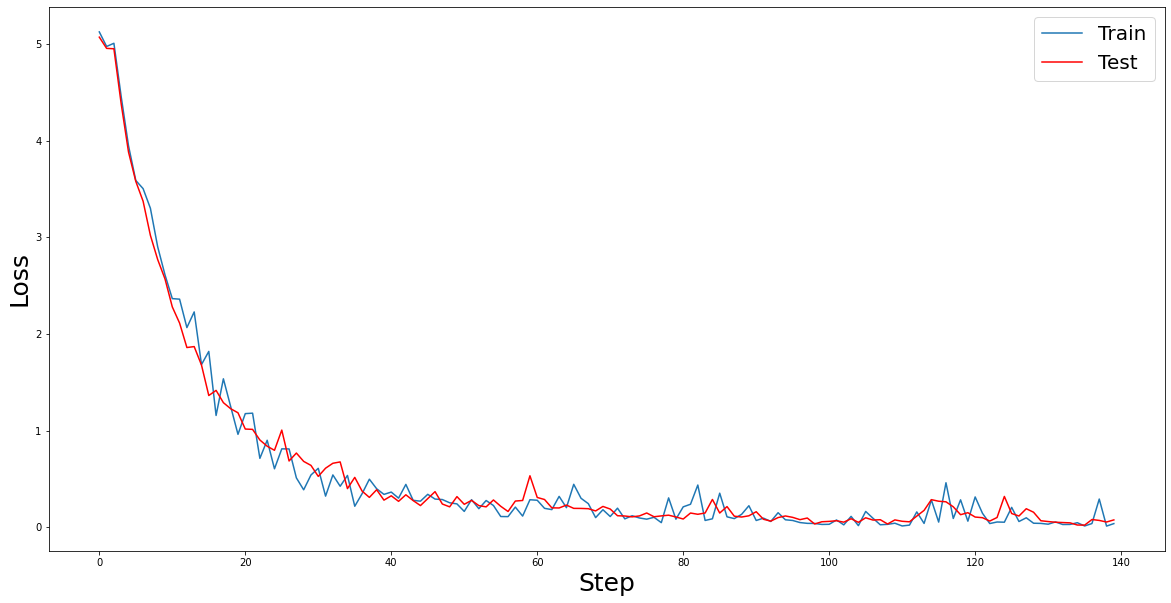

In [12]:
label_fontsize = 25

plt.figure(figsize=(20, 10))
train_lossline, = plt.plot(model.train_losses, label='Train')
test_lossline, = plt.plot(model.test_losses, color='red', label='Test')
plt.legend(handles=[train_lossline, test_lossline], fontsize=20)
plt.xlabel('Step', fontsize=label_fontsize)
plt.ylabel('Loss', fontsize=label_fontsize)
plt.show()

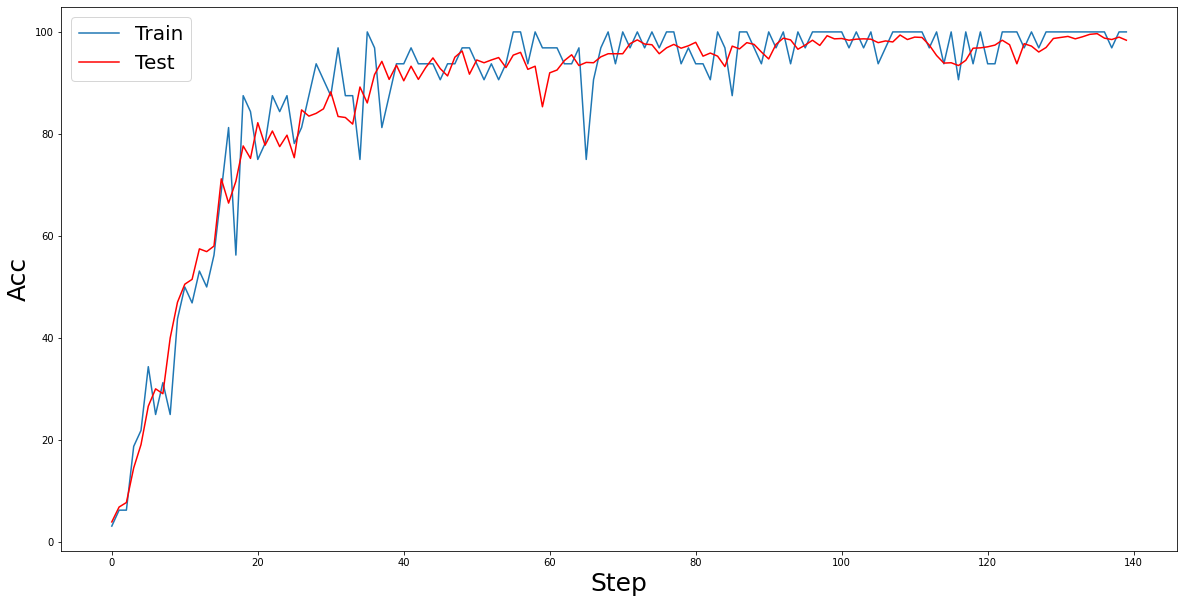

In [13]:
plt.figure(figsize=(20, 10))
train_accline, = plt.plot(model.train_acc, label='Train')
test_accline, = plt.plot(model.test_acc, color='red', label='Test')
plt.legend(handles=[train_accline, test_accline], fontsize=20)
plt.xlabel('Step', fontsize=label_fontsize)
plt.ylabel('Acc', fontsize=label_fontsize)
plt.show()

In [14]:
import os, json, PIL
import pandas as pd

In [15]:
model = Baseline(model='densenet201', num_classes=157)
model.model.load_state_dict(torch.load('./4_115.pt'))
model.model.eval()

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

In [16]:
test_transform = transforms.Compose([
    transforms.Resize(256), transforms.CenterCrop((224, 400)),
    transforms.ToTensor(), transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])


data_dir = './test/'

predictions = []
with torch.no_grad():
    for num in sorted(os.listdir(data_dir)):
        with open(data_dir + '{}/{}.json'.format(num, num), 'r') as j:
            temp = json.load(j)
            imgs = []
            for info in temp['annotations']:
                img_dir = data_dir + '{}/{}.png'.format(num, info['image_id'])
                img = PIL.Image.open(img_dir).convert('RGB')
                img = test_transform(img)
                imgs.append(img)
            imgs = torch.stack(imgs).cuda()
            prediction = torch.nn.Softmax(dim=1)(model.model(imgs))
            prediction = torch.mean(prediction, dim=0)
            # print(prediction)
            #if torch.max(prediction) > 0.9:
            #    prediction[torch.argmax(prediction)] = 1
            #    prediction[prediction < 1] = 0
            
            if torch.sum(prediction) != 1: print(torch.sum(prediction))
            predictions.append(prediction.cpu().numpy())

tensor(1.0000, device='cuda:0')
tensor(1.0000, device='cuda:0')
tensor(1.0000, device='cuda:0')
tensor(1.0000, device='cuda:0')
tensor(1.0000, device='cuda:0')
tensor(1.0000, device='cuda:0')
tensor(1.0000, device='cuda:0')
tensor(1.0000, device='cuda:0')
tensor(1.0000, device='cuda:0')
tensor(1.0000, device='cuda:0')
tensor(1.0000, device='cuda:0')
tensor(1.0000, device='cuda:0')
tensor(1.0000, device='cuda:0')
tensor(1.0000, device='cuda:0')
tensor(1.0000, device='cuda:0')
tensor(1.0000, device='cuda:0')
tensor(1.0000, device='cuda:0')
tensor(1.0000, device='cuda:0')
tensor(1.0000, device='cuda:0')
tensor(1.0000, device='cuda:0')
tensor(1.0000, device='cuda:0')
tensor(1.0000, device='cuda:0')
tensor(1.0000, device='cuda:0')
tensor(1.0000, device='cuda:0')
tensor(1.0000, device='cuda:0')
tensor(1.0000, device='cuda:0')
tensor(1.0000, device='cuda:0')
tensor(1.0000, device='cuda:0')
tensor(1.0000, device='cuda:0')
tensor(1.0000, device='cuda:0')
tensor(1.0000, device='cuda:0')
tensor(1

In [20]:
sample_submission = pd.read_csv('./sample_submission.csv')
sample_submission.iloc[:,1:] = predictions
sample_submission.to_csv('./ImageNetStat_4_115_threshno.csv', index=False)

In [18]:
print(len(predictions))
print(len(predictions[0]))

217
157


In [19]:
sample_submission.iloc[:,1:]

,Label_0,Label_1,Label_2,Label_3,Label_4,Label_5,Label_6,Label_7,Label_8,Label_9,Label_10,Label_11,Label_12,Label_13,Label_14,Label_15,Label_16,Label_17,Label_18,Label_19,Label_22,Label_23,Label_25,Label_26,Label_27,Label_28,Label_29,Label_31,Label_32,Label_34,Label_35,Label_36,Label_37,Label_39,Label_40,Label_41,Label_42,Label_43,Label_44,Label_47,...,Label_142,Label_143,Label_144,Label_145,Label_146,Label_147,Label_148,Label_149,Label_150,Label_151,Label_153,Label_154,Label_155,Label_156,Label_157,Label_158,Label_159,Label_160,Label_161,Label_162,Label_163,Label_165,Label_167,Label_168,Label_169,Label_171,Label_172,Label_173,Label_174,Label_175,Label_177,Label_186,Label_188,Label_189,Label_190,Label_191,Label_192,Label_193,Label_194,Label_195
0,9.109176e-01,9.484233e-04,5.536176e-05,3.296728e-05,1.258935e-05,1.309553e-04,5.467068e-02,1.575691e-04,1.850178e-05,1.595962e-04,5.589200e-03,1.641033e-05,8.065832e-06,4.356101e-06,9.447989e-06,1.221212e-05,7.625480e-04,4.863194e-05,5.438706e-06,8.320928e-05,3.969535e-04,5.660412e-04,4.093390e-03,1.328083e-04,2.311933e-04,8.436270e-05,1.920153e-05,4.070050e-05,1.240772e-04,4.690476e-06,5.744893e-04,4.706534e-05,1.239890e-05,2.270031e-05,2.020667e-05,2.098839e-05,7.054473e-04,1.251078e-05,4.656086e-05,6.336056e-05,...,2.639612e-03,1.460459e-05,6.743110e-05,9.854894e-06,2.763926e-05,7.611037e-05,2.779282e-05,6.223062e-05,2.529232e-05,1.155701e-05,2.809771e-05,1.359254e-05,1.913291e-05,1.475979e-06,1.026512e-04,9.306944e-05,1.329750e-05,1.376953e-05,1.999727e-05,1.078174e-05,3.688309e-05,5.196831e-05,1.817067e-04,2.941527e-05,2.413089e-05,0.000029,0.000027,8.255559e-05,1.437458e-05,3.013325e-06,1.154486e-05,2.294833e-05,7.508859e-06,8.307171e-06,1.383754e-05,0.000019,2.422044e-05,6.414875e-06,2.864900e-05,9.572330e-06
1,3.056994e-04,3.439814e-05,9.178743e-06,3.184443e-05,6.098949e-06,4.034678e-06,5.456408e-05,1.398291e-05,6.105319e-06,1.285805e-05,9.906229e-01,1.178176e-03,1.344111e-04,3.556292e-05,1.274891e-05,2.922586e-04,1.524485e-03,1.215562e-04,1.707890e-05,1.519448e-04,6.326217e-05,2.885551e-05,1.653760e-05,3.893897e-05,1.002989e-04,1.610915e-05,4.005412e-06,2.615530e-05,4.262390e-05,2.620680e-06,2.138546e-05,4.029363e-06,2.925145e-06,3.020453e-06,5.710861e-06,1.465564e-05,1.370387e-04,7.760539e-06,1.779938e-05,2.562666e-04,...,1.035255e-04,2.287626e-06,4.282586e-06,2.042035e-06,1.826548e-05,1.865960e-06,1.358081e-06,2.967469e-06,9.058139e-07,1.426601e-06,6.901947e-06,4.361041e-07,1.765673e-06,2.117216e-07,4.968066e-06,2.166713e-06,1.555789e-06,7.615987e-06,3.207741e-06,2.414490e-06,7.071645e-06,1.778304e-06,5.733249e-04,8.668661e-07,6.790582e-06,0.000014,0.000015,7.540126e-06,3.981385e-06,5.565614e-06,1.088090e-05,1.085138e-06,1.835510e-06,5.610324e-06,1.839787e-06,0.000010,8.440213e-06,9.701961e-07,1.904432e-06,5.267275e-06
2,1.928516e-05,2.122306e-03,5.813477e-04,3.283504e-04,3.831717e-05,4.837070e-06,7.152834e-06,4.261493e-04,6.419775e-05,1.130768e-05,1.077830e-02,9.273383e-01,3.296915e-02,1.363325e-03,4.454473e-05,1.020940e-04,3.740332e-05,5.881462e-03,5.722393e-04,9.630428e-04,8.643552e-05,2.548386e-05,1.407918e-05,4.200654e-05,5.014457e-04,3.017310e-05,5.310406e-06,6.424103e-05,5.433358e-05,4.085457e-06,4.163510e-05,4.854502e-06,6.131567e-06,4.265866e-05,5.122209e-04,1.928506e-05,3.057557e-05,1.920216e-05,1.829360e-05,2.036423e-03,...,4.561372e-05,4.901377e-06,1.391694e-05,6.882542e-06,5.971506e-05,3.113406e-05,6.959977e-06,2.008349e-05,8.193029e-06,5.834255e-06,3.355641e-05,3.287611e-06,4.102886e-05,1.643592e-06,2.746804e-05,1.452627e-05,1.174000e-05,1.766322e-05,1.683568e-05,1.462558e-05,4.072782e-05,2.434209e-05,9.212899e-04,6.520698e-06,1.962404e-05,0.000072,0.000066,1.085954e-05,8.217165e-06,6.182666e-05,6.115471e-05,8.926122e-06,1.160796e-05,1.407780e-05,5.806728e-06,0.000020,5.870026e-06,2.415947e-06,8.481987e-06,2.583100e-05
3,8.278376e-06,5.769771e-04,3.076167e-04,1.979240e-04,2.239390e-05,2.290714e-06,3.692510e-06,1.707181e-04,3.902005e-05,6.618295e-06,7.881370e-0